* Analizar una serie de tiempo con datos históricos para ajustarla de forma óptima a un modelo auto-regresivo adecuado de orden p (denominado AR(p)).

### Paso a paso:

* Considera la información histórica diaria de precios para la empresa Walt Disney Company (cuya sigla bursátil es “DIS”) contenida en el sitio de Yahoo finance (http://finance.yahoo.com) para el periodo que va del 1 de Enero del 2023 al 31 de Marzo del 2023. Los modelos auto-regresivos AR(p).                                                                                                                                                                                                                   
* Determina mediante la gráfica de Auto-Correlación Parcial y los estadísticos de Akaike y Bayesiano cuál sería el modelo auto-regresivo más adecuado para ajustar dicha serie de datos. Justifica claramente su respuesta mediante una base de entrenamiento del 70% de los datos.                                                                                                                                                                                                                                           
* Pronostica los precios diarios por acción para el mes de Abril del 2023, tanto de manera puntual como mediante un intervalo de confianza del 90%, a partir del resultado obtenido en el punto anterior, p.                                                                                                                                                                                 
* Responde ¿Qué tan exactos cree usted que serán sus predicciones? Justifique mediante el uso de indicadores de bondad de        ajuste.                                                                                                                         

* Grafica los resultados del punto anterior,  distinguiendo claramente por colores cada grupo de datos empleados en su análisis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import yfinance as yf

In [48]:
# Extraccioón de datos historicos con un rango especifico

dis = yf.download(tickers = 'DIS', start = '2023-01-01', end = '2023-04-01', rounding = True)
dis.columns = dis.columns.droplevel(1)
dis.index = pd.to_datetime(dis.index).strftime('%Y-%m-%d')
dis

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-01-03,88.27,88.97,89.97,87.83,88.98,14997100
2023-01-04,91.26,91.98,92.75,89.36,90.00,14957200
2023-01-05,91.20,91.92,92.48,90.51,91.66,11622600
2023-01-06,93.18,93.92,94.69,91.32,92.66,9828100
2023-01-09,94.03,94.77,95.70,93.45,94.43,11675800
...,...,...,...,...,...,...
2023-03-27,94.87,95.62,96.02,94.38,94.78,7487900
2023-03-28,94.08,94.82,96.00,94.59,95.51,5426100
2023-03-29,96.11,96.87,96.91,95.35,96.08,5889100


In [49]:
dis = dis['Close']
dis

Date
2023-01-03     88.97
2023-01-04     91.98
2023-01-05     91.92
2023-01-06     93.92
2023-01-09     94.77
               ...  
2023-03-27     95.62
2023-03-28     94.82
2023-03-29     96.87
2023-03-30     98.10
2023-03-31    100.13
Name: Close, Length: 62, dtype: float64

In [50]:
# utilizamos el 70% de la base para la base de entrenamiento
dis.index = pd.to_datetime(dis.index)
len_train = int(len(dis)* .7)
len_train

43

In [51]:
# utilizamos el 30% de la base para la base de pruebas

len_test = int(len(dis) * .3)
len_test

18

In [52]:
# definimos grupos de puerba y entrenamiento
train = dis[0:len_train]
train

Date
2023-01-03     88.97
2023-01-04     91.98
2023-01-05     91.92
2023-01-06     93.92
2023-01-09     94.77
2023-01-10     95.56
2023-01-11     96.33
2023-01-12     99.81
2023-01-13     99.40
2023-01-17     99.91
2023-01-18     99.04
2023-01-19     99.08
2023-01-20    103.48
2023-01-23    105.69
2023-01-24    106.00
2023-01-25    108.12
2023-01-26    109.70
2023-01-27    109.54
2023-01-30    107.59
2023-01-31    108.49
2023-02-01    109.39
2023-02-02    113.21
2023-02-03    110.71
2023-02-06    109.87
2023-02-07    111.63
2023-02-08    111.78
2023-02-09    110.36
2023-02-10    108.06
2023-02-13    107.66
2023-02-14    107.66
2023-02-15    109.24
2023-02-16    105.83
2023-02-17    105.22
2023-02-21    102.09
2023-02-22    101.68
2023-02-23    101.73
2023-02-24    100.30
2023-02-27    100.45
2023-02-28     99.61
2023-03-01     98.54
2023-03-02     98.92
2023-03-03    101.14
2023-03-06    100.66
Name: Close, dtype: float64

In [53]:
test = dis[len_train:]
test

Date
2023-03-07     99.06
2023-03-08     99.30
2023-03-09     96.14
2023-03-10     93.57
2023-03-13     92.60
2023-03-14     93.36
2023-03-15     93.10
2023-03-16     94.29
2023-03-17     93.20
2023-03-20     94.22
2023-03-21     96.54
2023-03-22     94.90
2023-03-23     95.83
2023-03-24     94.08
2023-03-27     95.62
2023-03-28     94.82
2023-03-29     96.87
2023-03-30     98.10
2023-03-31    100.13
Name: Close, dtype: float64

[ 1.00000000e+00  8.93676862e-01  8.05243892e-01  7.06909430e-01
  6.22030380e-01  5.25234900e-01  4.15450780e-01  3.00150124e-01
  2.19430750e-01  1.20838146e-01  4.18616085e-04 -1.11289565e-01
 -2.28961906e-01 -3.03417271e-01 -3.62183951e-01 -4.20839262e-01
 -4.48296465e-01]


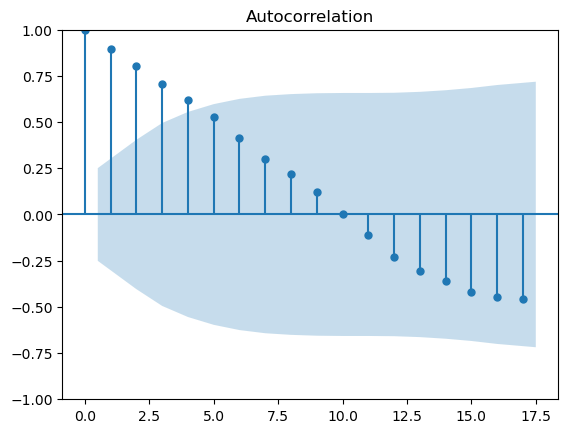

In [54]:
# obtenemos los valores para la grafica de autocorrelacion, funcion de autorcorrelacion(acf)

from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

acf_array = acf(train)
print(acf_array)

# grafico de nivel de confianza del 90%

plot_acf(train, alpha = 0.10)
plt.show()

In [55]:
# hacemos el ajuste con ARIMA
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order = (1,0,0))
result = model.fit()

C:\Users\Isaac\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Isaac\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Isaac\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [56]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   43
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -86.541
Date:                Wed, 06 Nov 2024   AIC                            179.083
Time:                        14:00:17   BIC                            184.367
Sample:                             0   HQIC                           181.031
                                 - 43                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         98.0216      5.257     18.645      0.000      87.717     108.326
ar.L1          0.9717      0.031     30.960      0.000       0.910       1.033
sigma2         3.0655      0.663      4.624      0.0

In [57]:
# realizamos las predicciones

predicciones = result.forecast(len(test))
predicciones

C:\Users\Isaac\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


43    100.585304
44    100.512722
45    100.442195
46    100.373665
47    100.307075
48    100.242371
49    100.179498
50    100.118405
51    100.059042
52    100.001360
53     99.945310
54     99.890848
55     99.837927
56     99.786505
57     99.736538
58     99.687986
59     99.640809
60     99.594967
61     99.550423
Name: predicted_mean, dtype: float64

In [59]:
# pronosticamos con un intervalode confianza de 90%
conf = result.get_forecast(len(test)).conf_int(alpha = .10)
conf

C:\Users\Isaac\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,lower Close,upper Close
43,97.705423,103.465184
44,96.497195,104.528249
45,95.592651,105.291740
46,94.851077,105.896254
47,94.216903,106.397248
48,93.661072,106.823669
49,93.165983,107.193013
50,92.719940,107.516870
51,92.314658,107.803426
52,91.943984,108.058735


In [60]:
fcast_result = result.get_forecast(len(test))
print(fcast_result.summary_frame(alpha = .10))

Close        mean   mean_se  mean_ci_lower  mean_ci_upper
43     100.585304  1.750843      97.705423     103.465184
44     100.512722  2.441267      96.497195     104.528249
45     100.442195  2.948314      95.592651     105.291740
46     100.373665  3.357495      94.851077     105.896254
47     100.307075  3.702562      94.216903     106.397248
48     100.242371  4.001145      93.661072     106.823669
49     100.179498  4.263914      93.165983     107.193013
50     100.118405  4.497947      92.719940     107.516870
51     100.059042  4.708251      92.314658     107.803426
52     100.001360  4.898536      91.943984     108.058735
53      99.945310  5.071651      91.603187     108.287433
54      99.890848  5.229845      91.288519     108.493177
55      99.837927  5.374937      90.996943     108.678911
56      99.786505  5.508423      90.725956     108.847054
57      99.736538  5.631554      90.473456     108.999620
58      99.687986  5.745391      90.237659     109.138313
59      99.640

C:\Users\Isaac\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [61]:
# Convertimos test a DataFrame
test = pd.DataFrame(test)
test = test.reset_index()

In [62]:
# Convertimos test a DataFrame
predicciones = pd.DataFrame(predicciones)
predicciones = predicciones.reset_index()

In [73]:
test

,Date,Close
0,2023-03-07,99.06
1,2023-03-08,99.30
2,2023-03-09,96.14
3,2023-03-10,93.57
4,2023-03-13,92.60
5,2023-03-14,93.36
6,2023-03-15,93.10
7,2023-03-16,94.29
8,2023-03-17,93.20
9,2023-03-20,94.22


In [72]:
predicciones

,index,predicted_mean
0,43,100.585304
1,44,100.512722
2,45,100.442195
3,46,100.373665
4,47,100.307075
5,48,100.242371
6,49,100.179498
7,50,100.118405
8,51,100.059042
9,52,100.001360


In [71]:
# calculamos el nivel de error cuando comparamos las predicciones con los valores de test

acumulador1 = 0
acumulador2 = 0

for contador in range(0, 18):
    acumulador1 = acumulador1 + (test.iloc[contador][1] - predicciones.iloc[contador][1]) ** 2
    acumulador2 = acumulador2 + np.abs((test.iloc[contador][1] - predicciones.iloc[contador][1]) / test.iloc[contador][1])

mse = acumulador1 / 18
rmse = np.round(np.sqrt(mse), 2)
mape = np.round((acumulador2 / 18) * 100, 2)
print('RSEM =', rmse, 'Mape =', mape, '%')                                                           

RSEM = 5.14 Mape = 5.02 %


In [74]:
# Tambien podemos usar sklearn y obtendriamos resultados parecidos

from sklearn.metrics import mean_squared_error

# RMSE
rmse = np.round(np.sqrt(mean_squared_error(test['Close'], predicciones['predicted_mean'])), 2)

# MAPE
mape = np.round(np.mean(np.abs((test['Close'] - predicciones['predicted_mean']) / test['Close'])) * 100, 2)

print('RMSE =', rmse, 'Mape =', mape, '%')

RMSE = 5.0 Mape = 4.79 %


### * La desvacion media absoluta porcentual es de Mape = 5.0 %, y en promedio nos equivocamos 4.79 dlls al pronosticar

**Pronostica los precios diarios por acción para el mes de Abril del 2023, tanto de manera puntual como mediante un intervalo de confianza del 90%, a partir del resultado obtenido en el punto anterior, p.**

In [76]:
# pronostico para el mes de abril

predicciones = result.forecast(len(test) + 30)
predicciones.tail(30)

C:\Users\Isaac\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


62    99.507141
63    99.465083
64    99.424217
65    99.384507
66    99.345922
67    99.308429
68    99.271997
69    99.236597
70    99.202199
71    99.168775
72    99.136297
73    99.104739
74    99.074074
75    99.044278
76    99.015325
77    98.987191
78    98.959854
79    98.933292
80    98.907481
81    98.882401
82    98.858031
83    98.834350
84    98.811341
85    98.788982
86    98.767257
87    98.746147
88    98.725634
89    98.705703
90    98.686335
91    98.667516
Name: predicted_mean, dtype: float64

In [77]:
# realizamos un pronostico con intervalode confianza del 90%

conf = result.get_forecast(len(test) + 30).conf_int(alpha = 0.10)
conf.tail(30)

C:\Users\Isaac\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,lower Close,upper Close
62,89.433670,109.580611
63,89.261943,109.668223
64,89.100140,109.748293
65,88.947531,109.821483
66,88.803458,109.888385
67,88.667326,109.949531
68,88.538593,110.005401
69,88.416767,110.056427
70,88.301396,110.103002
71,88.192067,110.145483


In [78]:
train = pd.DataFrame(train)
lista = test['Date']
lista = pd.DataFrame(lista)
test.index = test['Date']
test.drop(columns = ['Date'], inplace = True)
test

,Close
Date,
2023-03-07,99.06
2023-03-08,99.30
2023-03-09,96.14
2023-03-10,93.57
2023-03-13,92.60
2023-03-14,93.36
2023-03-15,93.10
2023-03-16,94.29
2023-03-17,93.20


In [79]:
lista

,Date
0,2023-03-07
1,2023-03-08
2,2023-03-09
3,2023-03-10
4,2023-03-13
5,2023-03-14
6,2023-03-15
7,2023-03-16
8,2023-03-17
9,2023-03-20


In [86]:
# generamos 30 dias poseteriores (mes de abril) de la ultima fecha '2023-03-31'

lista2 = []
for day in range(1, 21):
    fecha = ((pd.to_datetime('2023-03-31') + pd.offsets.BDay(day)).date())
    lista2.append(fecha)

# convertimos lista2 en DF

lista2 = pd.DataFrame(lista2, columns = ['Date'])
lista2['Date'] = pd.to_datetime(lista2['Date'])
lista2

,Date
0,2023-04-03
1,2023-04-04
2,2023-04-05
3,2023-04-06
4,2023-04-07
5,2023-04-10
6,2023-04-11
7,2023-04-12
8,2023-04-13
9,2023-04-14


In [87]:
lista3 = lista.append(lista2)
lista3 = lista3.reset_index()
lista3

,index,Date
0,0,2023-03-07
1,1,2023-03-08
2,2,2023-03-09
3,3,2023-03-10
4,4,2023-03-13
5,5,2023-03-14
6,6,2023-03-15
7,7,2023-03-16
8,8,2023-03-17
9,9,2023-03-20


In [89]:
lista3.drop(columns = ['index'], inplace = True)
lista3

,Date
0,2023-03-07
1,2023-03-08
2,2023-03-09
3,2023-03-10
4,2023-03-13
5,2023-03-14
6,2023-03-15
7,2023-03-16
8,2023-03-17
9,2023-03-20


In [90]:
# predcciones lo convertimos en DF, y reseteamos el indice

predicciones = pd.DataFrame(predicciones)
predicciones = predicciones.reset_index()

predicciones.drop(columns = ['index'], inplace = True)
predicciones

,predicted_mean
0,100.585304
1,100.512722
2,100.442195
3,100.373665
4,100.307075
5,100.242371
6,100.179498
7,100.118405
8,100.059042
9,100.001360


In [98]:
# concatenamos lista3 con las predicciones

frames = [lista3, predicciones]
res = pd.concat(frames, axis = 1, join = 'inner')

# renombramos las columnas

res.columns = ['Date', 'Predicciones']
res

,Date,Predicciones
0,2023-03-07,100.585304
1,2023-03-08,100.512722
2,2023-03-09,100.442195
3,2023-03-10,100.373665
4,2023-03-13,100.307075
5,2023-03-14,100.242371
6,2023-03-15,100.179498
7,2023-03-16,100.118405
8,2023-03-17,100.059042
9,2023-03-20,100.001360


In [100]:
# dejamos como indice el campo 'Date'

res.index = res['Date']
res.drop(columns = ['Date'], inplace = True)
res

,Predicciones
Date,
2023-03-07,100.585304
2023-03-08,100.512722
2023-03-09,100.442195
2023-03-10,100.373665
2023-03-13,100.307075
2023-03-14,100.242371
2023-03-15,100.179498
2023-03-16,100.118405
2023-03-17,100.059042


In [101]:
conf = conf.reset_index()
conf.drop(columns = ['index'], inplace = True)
conf

,lower Close,upper Close
0,97.705423,103.465184
1,96.497195,104.528249
2,95.592651,105.291740
3,94.851077,105.896254
4,94.216903,106.397248
5,93.661072,106.823669
6,93.165983,107.193013
7,92.719940,107.516870
8,92.314658,107.803426
9,91.943984,108.058735


In [119]:
frames = [lista3, conf]
intervalos = pd.concat(frames, axis = 1, join = 'inner')
intervalos.tail(10)

,Date,lower Close,upper Close
29,2023-04-17,88.088400,110.184194
30,2023-04-18,87.990046,110.219433
31,2023-04-19,87.896679,110.251469
32,2023-04-20,87.808002,110.280553
33,2023-04-21,87.723737,110.306912
34,2023-04-24,87.643627,110.330755
35,2023-04-25,87.567433,110.352276
36,2023-04-26,87.494931,110.371652
37,2023-04-27,87.425915,110.389047
38,2023-04-28,87.360189,110.404612


In [120]:
intervalos.index = intervalos['Date']
intervalos.drop(columns = ['Date'], inplace = True)
intervalos.tail(15)

,lower Close,upper Close
Date,,
2023-04-10,88.667326,109.949531
2023-04-11,88.538593,110.005401
2023-04-12,88.416767,110.056427
2023-04-13,88.301396,110.103002
2023-04-14,88.192067,110.145483
2023-04-17,88.088400,110.184194
2023-04-18,87.990046,110.219433
2023-04-19,87.896679,110.251469
2023-04-20,87.808002,110.280553


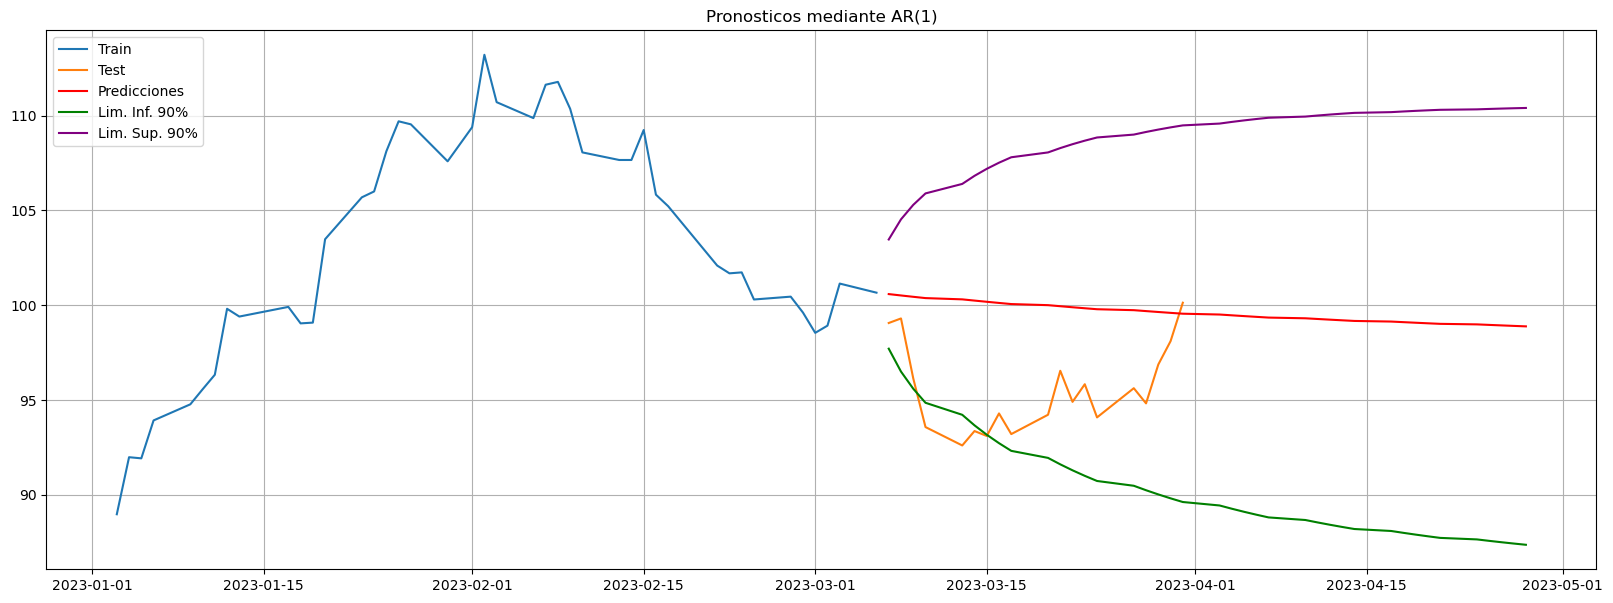

In [106]:
# gráficamos

plt.figure(figsize = (20,7))
plt.grid()
plt.plot(train, label = 'Train')
plt.plot(test, label = 'Test')
plt.plot(res, label = 'Predicciones', color = 'red')
plt.plot(intervalos['lower Close'], label = 'Lim. Inf. 90%', color = 'green') 
plt.plot(intervalos['upper Close'], label = 'Lim. Sup. 90%', color = 'purple')
plt.legend()
plt.title('Pronosticos mediante AR(1)')
plt.show()

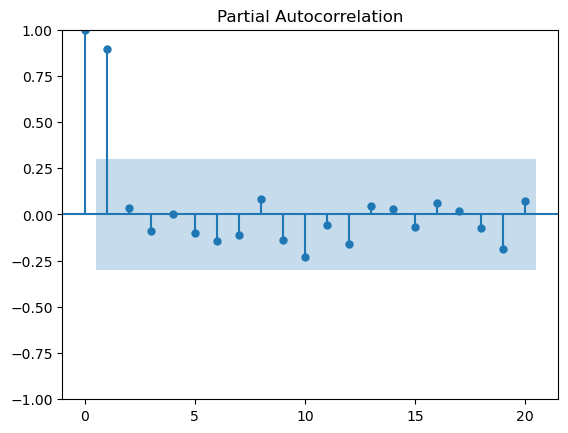

In [113]:
# Determinación del valor adecuado de p para AR(1) a partir de la función de autocorrelación parcial

from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(train, lags = 20)
plt.show()

#### * Conclusión: El modelo AR(1) parace ser el mas adecuado

C:\Users\Isaac\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Isaac\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Isaac\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Isaac\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

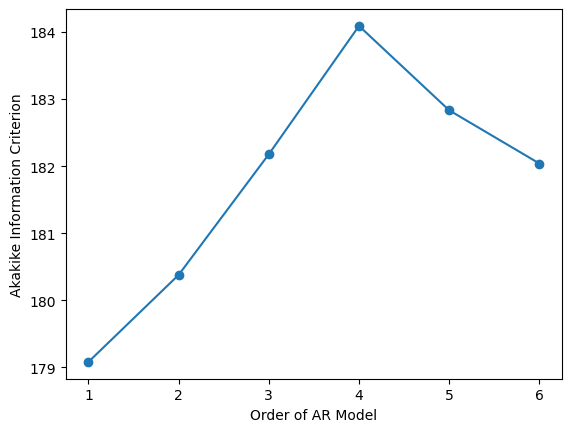

In [117]:
# Determinación del valor adecuado de p para AR(p), a partir del criterio de de información Akaike
# fit the data to an AR(p) for p = 0,...,6 and save the BIC

AIC = np.zeros(7)
for p in range(7):
    model = ARIMA(train, order = (p,0,0))
    result = model.fit()
    
# save the BIC for AR(p)
    AIC[p] = result.aic

# graficamos

plt.plot(range(1,7), AIC[1:7], marker = 'o')
plt.xlabel('Order of AR Model')
plt.ylabel('Akakike Information Criterion')
plt.show()

C:\Users\Isaac\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Isaac\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Isaac\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Isaac\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

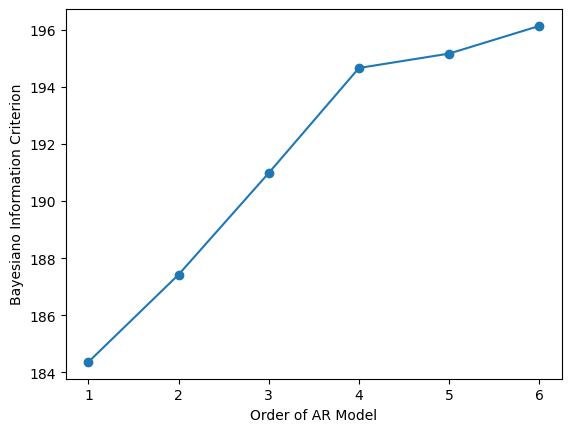

In [118]:
# Determinación del valor adecuado de p para AR(p), a partir del criterio de de información Bayesiano
# fit the data to an AR(p) for p = 0,...,6 and save the BIC

BIC = np.zeros(7)
for p in range(7):
    mod = ARIMA(train, order = (p,0,0))
    res = mod.fit()

# save the BIC for AR(p)
    BIC[p] = res.bic
    
# Graficamos
plt.plot(range(1,7), BIC[1:7], marker = 'o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesiano Information Criterion')
plt.show()

### Conclusión: En ambos Indices se tiene el menor valor para p = 1.
 * **Se recomienda utilizar el modelo AR(1)**